In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [3]:
result = pd.DataFrame()
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    file_name = 'result-%d.csv' % (i)
    read = pd.read_csv(file_name, index_col=0)
    result = pd.concat([result, read], ignore_index=True)
result.shape

(285691, 17)

In [4]:
rgb_out = result.iloc[:,0:8]
#print(rgb_out[0:10])
flow_out = result.iloc[:,8:16]
#print(flow_out[0:5])
labels = result.iloc[:,16]
#print(labels[:5])
#print(rgb_out.shape)

In [5]:
mixed = []
flow_weight = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for weight in range(11):
    mixed.append(np.asarray(rgb_out)*(1-flow_weight[weight]) + np.asarray(flow_out)*flow_weight[weight])
mixed[10][1]

array([ 4.3533006,  6.07057  ,  0.2720636, -3.8268132, -2.4947174,
        9.829166 , -5.4237723, -5.2382607])

In [6]:
sm = []
for weight in range(11):
    tmp = []
    for i in range(mixed[weight].shape[0]):
        tmp.append(softmax(mixed[weight][i]))
    sm.append(np.asarray(tmp))

In [7]:
labels[2]

1

In [8]:
from sklearn.metrics import accuracy_score

class_acc = []
for i in range(8):
    acc = []
    for weight in range(11):
        acc.append(accuracy_score(labels[labels==i], sm[weight][labels==i].argmax(axis=1)))
    class_acc.append(acc)
print(class_acc)

[[0.7646176911544228, 0.7811094452773614, 0.7901049475262368, 0.7868065967016492, 0.782608695652174, 0.7598200899550225, 0.7295352323838081, 0.6926536731634183, 0.6491754122938531, 0.6014992503748126, 0.5592203898050975], [0.8946746597820855, 0.9156347087909683, 0.93344418675885, 0.9474029667877303, 0.9560232792193585, 0.9586049971557344, 0.9575548068087341, 0.9550168468034831, 0.9511661488644817, 0.9453025860937295, 0.9407955191878528], [0.8995894552967361, 0.9286379314931236, 0.9449976502301001, 0.9558775282194064, 0.9629889073126613, 0.9666953368151308, 0.9678657882369632, 0.9670411520079449, 0.9647268503329579, 0.9607898773686124, 0.9558243258820505], [0.9986712040187976, 0.9994814454707502, 0.9994490358126722, 0.9994814454707502, 0.999416626154594, 0.9991897585480474, 0.999092529573813, 0.9984119267541728, 0.9971803597472046, 0.9957543347917679, 0.9940366229136283], [0.8128838364040246, 0.8612308898471188, 0.8865804259767411, 0.8992551940415523, 0.900953874297661, 0.90108454200966

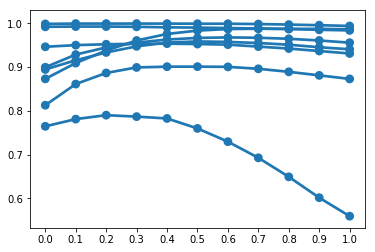

In [9]:
sns.pointplot(flow_weight, class_acc[0])
sns.pointplot(flow_weight, class_acc[1])
sns.pointplot(flow_weight, class_acc[2])
sns.pointplot(flow_weight, class_acc[3])
sns.pointplot(flow_weight, class_acc[4])
sns.pointplot(flow_weight, class_acc[5])
sns.pointplot(flow_weight, class_acc[6])
sns.pointplot(flow_weight, class_acc[7])

0.7646176911544228


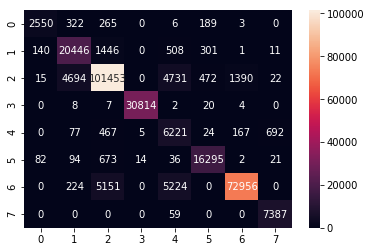

In [10]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(labels, sm[0].argmax(axis=1))
print(cfm[0][0]/cfm[0].sum())
sns.heatmap(cfm, annot=True, fmt='d')

In [11]:
print(labels.shape)
sum = 0
for i in range(8):
    print(len(labels[labels==i]))
    sum+=len(labels[labels==i])
sum

(285691,)
3335
22853
112777
30855
7653
17217
83555
7446


285691

In [12]:
sm[0].argmax(axis=1)
sm[0][1]

array([4.51350899e-06, 9.99364541e-01, 1.59427472e-05, 9.08562126e-08,
       4.60125686e-06, 6.10031074e-04, 4.20543015e-08, 2.37542172e-07])

In [24]:
num_frames = labels.value_counts()
num_frames[sorted(num_frames.index)]

0      3335
1     22853
2    112777
3     30855
4      7653
5     17217
6     83555
7      7446
Name: label, dtype: int64

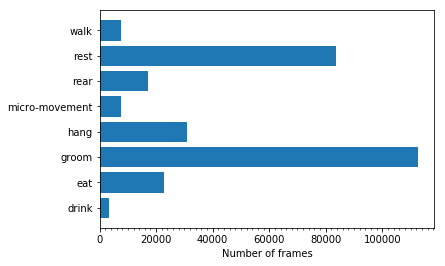

In [65]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
majorLocator = MultipleLocator(10000)
minorLocator = MultipleLocator(2000)
fig, ax = plt.subplots()
#ax.yaxis.set_major_formatter(formatter)
ax.barh(num_frames.index, num_frames.values)
ax.set_xlabel("Number of frames")
plt.yticks(sorted(num_frames.index), ('drink', 'eat', 'groom', 'hang', 'micro-movement', 'rear', 'rest', 'walk'))
plt.xticks()
#x.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
plt.show()
fig.savefig('num_frames.pdf', bbox_inches='tight')